In [ ]:
# EXTRACTING THE LIABRARIES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
# LOAD DATASET (TITANIC SURVIVAL PREDICTION)

titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# Basic Info. About Data

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Demonstrate The Dataset Statistics

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Showcase Dataset glimpse

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


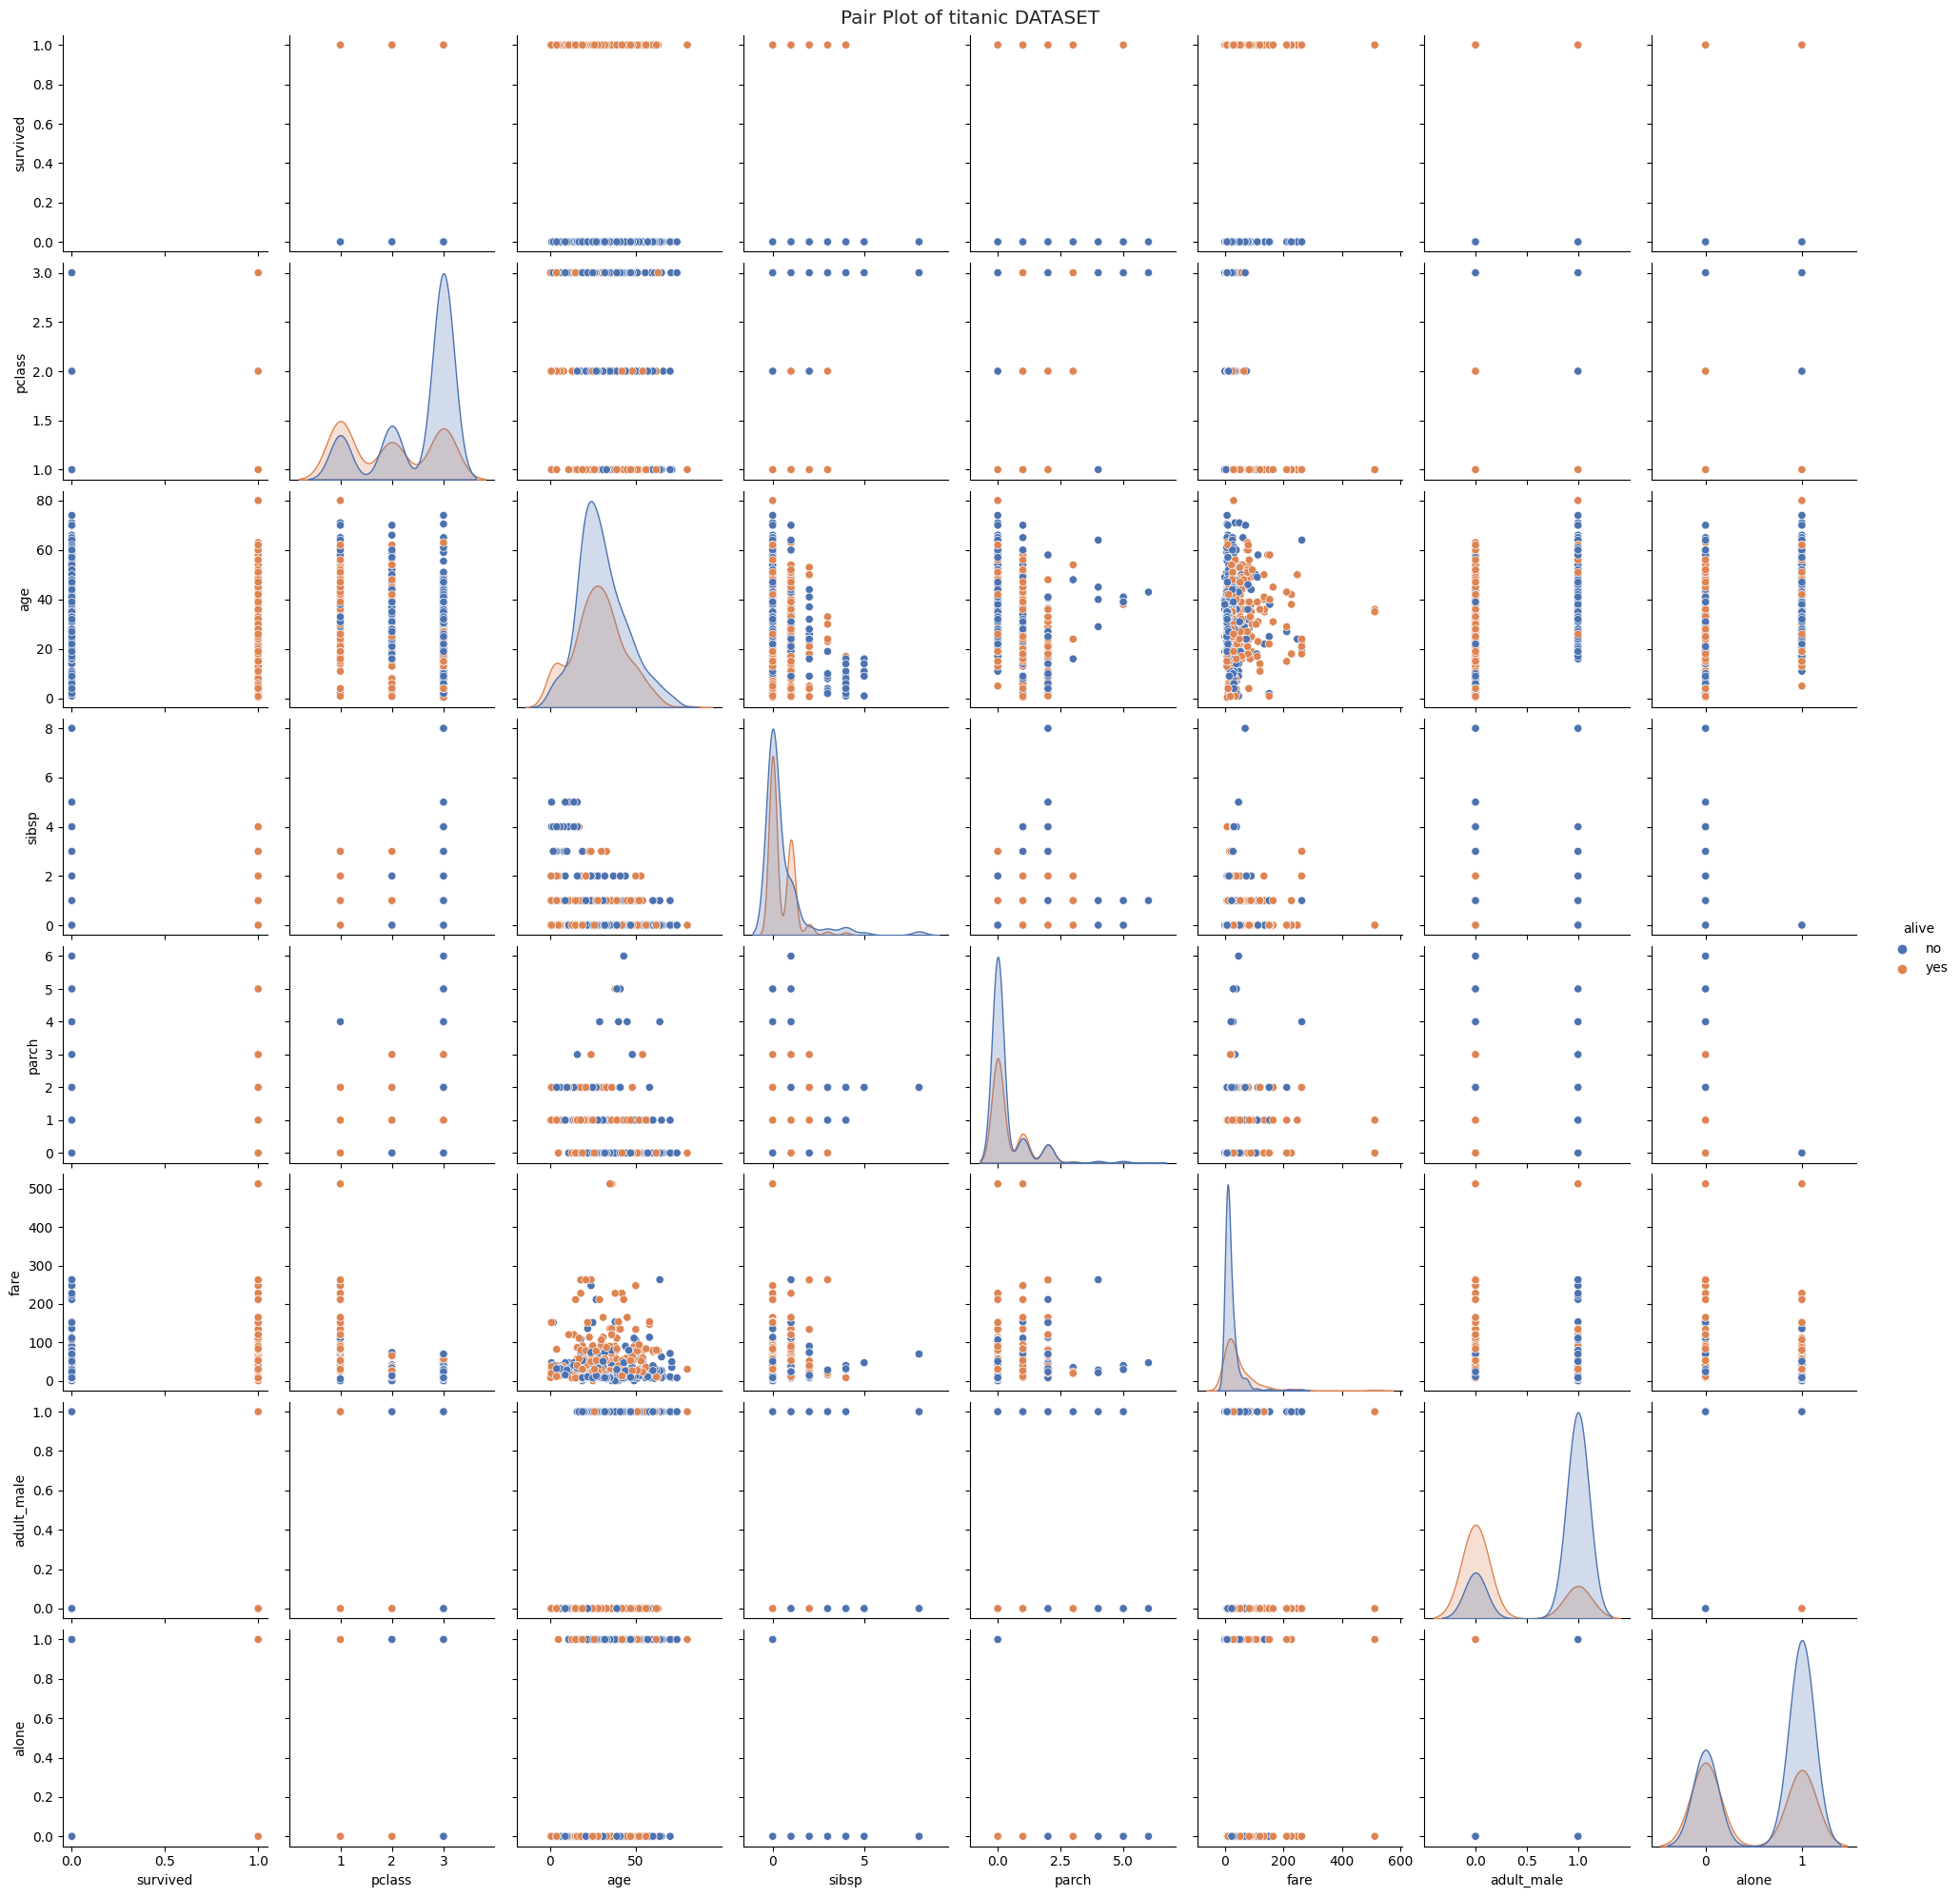

In [ ]:
# DATA VISUALIZATION

sns.pairplot(titanic , hue = "alive" , palette = "deep" , diag_kind = "kde")
sns.set_theme(style = "ticks")
plt. suptitle("Pair Plot of titanic DATASET" , y = 1)
plt.show()

<Axes: title={'center': 'Scatter Plot of Age vs Fare'}, xlabel='fare', ylabel='age'>

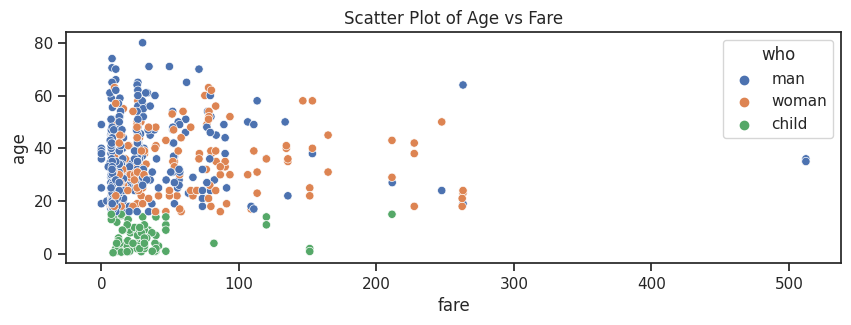

In [ ]:
  # Create scater plot of (Age vs Fare)

plt.figure(figsize = (10, 3) , dpi = 100 )
plt.title("Scatter Plot of Age vs Fare")
sns.set_theme(style = "whitegrid")
sns.scatterplot(data = titanic , x = "fare" , y = "age" , hue =  "who")

<Axes: title={'center': 'Scatter Plot of Age vs Survived'}, xlabel='age', ylabel='survived'>

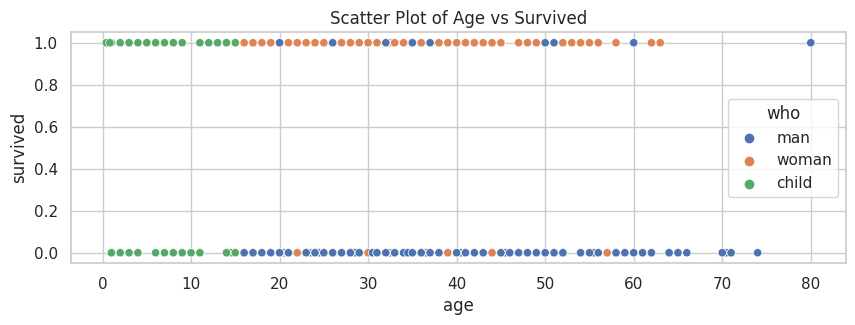

In [ ]:
  # Create scater plot of (Age vs Survived)

plt.figure(figsize = (10, 3) , dpi = 100 )
plt.title("Scatter Plot of Age vs Survived")
sns.set_theme(style = "whitegrid")
sns.scatterplot(data = titanic , y = "survived" , x = "age" , hue =  "who")

<Axes: title={'center': 'Embarked vs Survival'}, xlabel='embarked', ylabel='survived'>

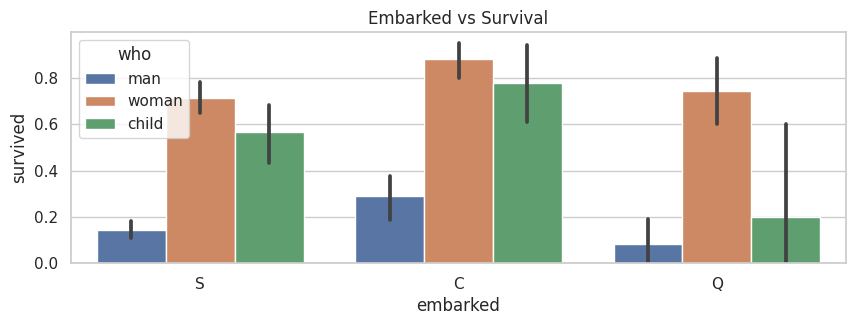

In [ ]:
# Creating Bar chart of Survived Vs Embarked

plt.figure(figsize = (10, 3) , dpi = 100 )
plt.title("Embarked vs Survival")
sns.set_theme(style = "ticks")
sns.barplot(data = titanic , x = "embarked" , y = "survived" , hue = "who" )

In [ ]:
# Split the data into traning and test sets

x = titanic.drop("survived" , axis = 1)
y = titanic["survived"]
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.25)

In [ ]:
# Machine Learning Algorithim to use

model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Correlation Analysis

correlation = titanic[['age' , 'fare']].corr()
print(correlation)

# Cross Tabulation

cross_tab = titanic['pclass'], titanic['survived']
print(cross_tab)

           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000
(0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64, 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64)
